In [1]:
#### get top 5 repos for keyword ###
import requests

keyword = "android" #change this to what you want to search for
headers = {"Authorization": "token "}


def run_query(query): # A simple function to use requests.post to make the API call. Note the json= section.
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

        
# The GraphQL query (with a few aditional bits included) itself defined as a multi-line string.       
query = """
 {
  search(query: \"topic:%s\", type: REPOSITORY, first: 5) {
    edges {
      node {
        ... on Repository {
          nameWithOwner
        }
      }
    }
  }
}
"""

result = run_query(query % keyword) # Execute the query

repos = []
for node in result["data"]["search"]["edges"]:
    repos.append(node["node"]["nameWithOwner"])
    

In [2]:
from pydriller import RepositoryMining
from datetime import datetime
import time
import pandas as pd


now = datetime.now() 
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)
repo_stats = pd.DataFrame()
for repo in repos:
    url = "https://github.com/" + repo + ".git"

    commit_months = []
    emails = []

    for commit in RepositoryMining(path_to_repo=url).traverse_commits():
        commit_months.append("%s-%s" % (commit.author_date.year,str(commit.author_date.month).zfill(2)))
        emails.append(commit.author.email)

    df = pd.DataFrame({'commit_month': commit_months, 'email': emails})
    commits_by_month = df.sort_values('commit_month').groupby('commit_month')['email'].nunique()
    repo_stats += commits_by_month.to_frame()

now = datetime.now() 
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 04/12/2020 18:17:42
date and time = 04/12/2020 18:24:32


['flutter/flutter', 'justjavac/free-programming-books-zh_CN', 'Hack-with-Github/Awesome-Hacking', 'google/material-design-icons', 'Genymobile/scrcpy']
['2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2018-01', '2017-12', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '2018-02', '

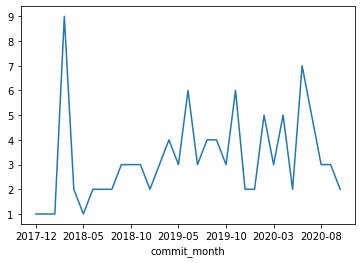

In [6]:
print(repos)
print(commit_months)
commits_by_month.plot()
#c2 = df.sort_values(repo).groupby(repo)['email'].nunique()
#c3 = c2 + 7
#ct = pd.concat([c2, c3], axis=1)
#ct.append(c3)

#ct.plot()
